In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output

%matplotlib inline

plt.style.use('default')
sns.set(style="whitegrid")
pd.options.display.float_format= '{:20,.2f}'.format

In [2]:
clicks= pd.read_csv('Datos\clicks.csv.gzip',compression='gzip',engine='python')
#clicks['dia'] = pd.to_datetime(clicks['created']).dt.date
#clicks['hora'] = pd.to_datetime(clicks['created']).dt.time
#clicks.drop(['created'], axis=1, inplace=True)
clicks['created'] = pd.to_datetime(clicks['created'], format='%Y/%m/%d %H:%M')
clicks['dia'] = pd.to_datetime(clicks['created']).dt.date
clicks['hora'] = pd.to_datetime(clicks['created']).dt.time
clicks['dia']

0        2019-03-06
1        2019-03-08
2        2019-03-08
3        2019-03-06
4        2019-03-06
5        2019-03-07
6        2019-03-12
7        2019-03-06
8        2019-03-07
9        2019-03-07
10       2019-03-07
11       2019-03-07
12       2019-03-07
13       2019-03-07
14       2019-03-07
15       2019-03-07
16       2019-03-07
17       2019-03-07
18       2019-03-07
19       2019-03-07
20       2019-03-07
21       2019-03-07
22       2019-03-07
23       2019-03-07
24       2019-03-07
25       2019-03-07
26       2019-03-07
27       2019-03-07
28       2019-03-07
29       2019-03-07
            ...    
26321    2019-03-12
26322    2019-03-12
26323    2019-03-12
26324    2019-03-12
26325    2019-03-12
26326    2019-03-12
26327    2019-03-12
26328    2019-03-12
26329    2019-03-12
26330    2019-03-12
26331    2019-03-12
26332    2019-03-12
26333    2019-03-12
26334    2019-03-12
26335    2019-03-12
26336    2019-03-12
26337    2019-03-12
26338    2019-03-12
26339    2019-03-12


In [4]:
clicks['hora']= (clicks['created'].dt.hour*100+ clicks['created'].dt.minute)
dia1= clicks[(clicks['dia'].astype('str')== '2019-03-05')]
dia2= clicks[(clicks['dia'].astype('str')== '2019-03-06')]
dia3= clicks[(clicks['dia'].astype('str')== '2019-03-07')]
dia4= clicks[(clicks['dia'].astype('str')== '2019-03-08')]
dia5= clicks[(clicks['dia'].astype('str')== '2019-03-09')]
dia6= clicks[(clicks['dia'].astype('str')== '2019-03-10')]
dia7= clicks[(clicks['dia'].astype('str')== '2019-03-11')]
dia8= clicks[(clicks['dia'].astype('str')== '2019-03-12')]
dia9= clicks[(clicks['dia'].astype('str')== '2019-03-13')]

#Para ver con qué datos quedarme, a pocos datos poca representación estadística
print(dia1['hora'].describe())
print(dia2['hora'].describe())
print(dia3['hora'].describe())
print(dia4['hora'].describe())
print(dia5['hora'].describe())
print(dia6['hora'].describe())
print(dia7['hora'].describe())
print(dia8['hora'].describe())
print(dia9['hora'].describe())

count                  31.00
mean                1,148.84
std                   820.39
min                   117.00
25%                   235.00
50%                 1,341.00
75%                 1,934.00
max                 2,322.00
Name: hora, dtype: float64
count                  14.00
mean                1,221.07
std                   813.34
min                   108.00
25%                   314.00
50%                 1,344.00
75%                 1,864.75
max                 2,242.00
Name: hora, dtype: float64
count               2,989.00
mean                2,304.61
std                    69.45
min                   318.00
25%                 2,257.00
50%                 2,318.00
75%                 2,338.00
max                 2,359.00
Name: hora, dtype: float64
count               2,839.00
mean                  550.79
std                   407.48
min                     0.00
25%                   138.00
50%                   545.00
75%                   953.50
max                 

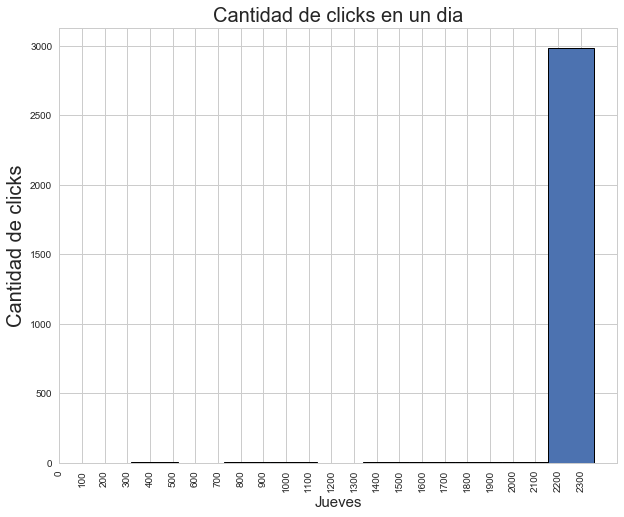

In [39]:
dia3.hist(column='hora', grid=True, edgecolor = "Black", linewidth = 1, figsize=(10,8), xrot=90, xlabelsize=10, ylabelsize=10);
plt.xticks(range(0,2359,100));
plt.xlabel('Jueves', fontsize=15);
plt.ylabel('Cantidad de clicks', fontsize=20)
plt.title('Cantidad de clicks en un dia', fontsize=20);


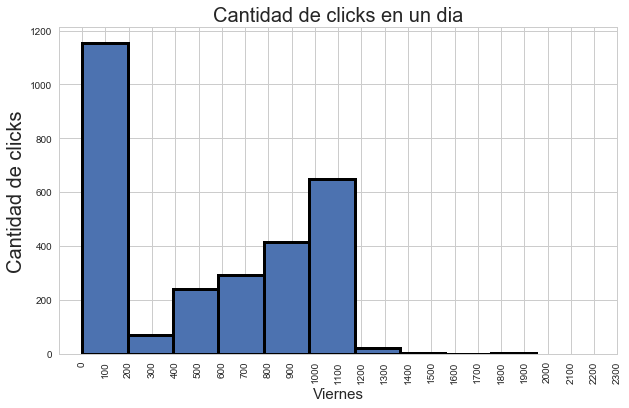

In [42]:
dia4.hist(column='hora', grid=True, edgecolor = "Black", linewidth = 3,figsize=(10,6), xrot=90, xlabelsize=10, ylabelsize=10);
plt.xticks(range(0,2359,100));
plt.xlabel('Viernes', fontsize=15);
plt.ylabel('Cantidad de clicks', fontsize=20)
plt.title('Cantidad de clicks en un dia', fontsize=20);

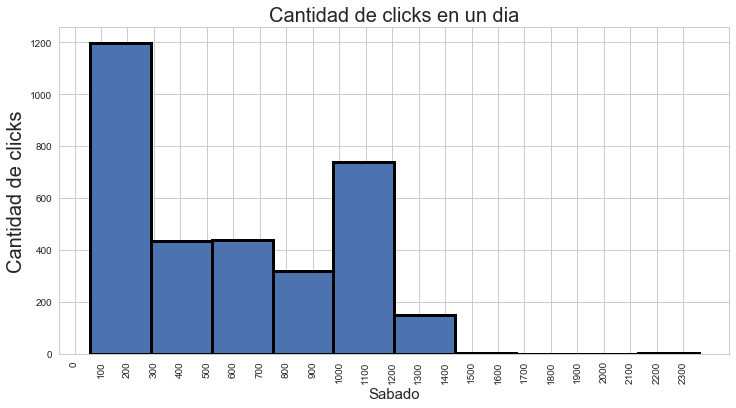

In [44]:
dia5.hist(column='hora', grid=True, edgecolor = "Black", linewidth =3, figsize=(12,6), xrot=90, xlabelsize=10, ylabelsize=10);
plt.xticks(range(0,2359,100));
plt.xlabel('Sabado', fontsize=15);
plt.ylabel('Cantidad de clicks', fontsize=20)
plt.title('Cantidad de clicks en un dia', fontsize=20);

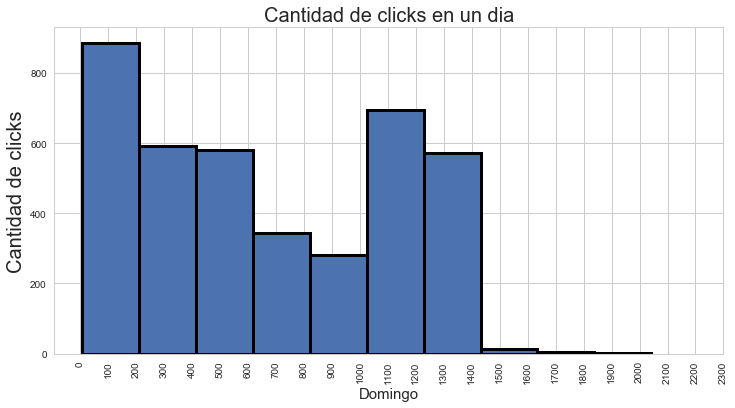

In [46]:
dia6.hist(column='hora', grid=True,edgecolor = "Black", linewidth =3, figsize=(12,6), xrot=90, xlabelsize=10, ylabelsize=10);
plt.xticks(range(0,2359,100));
plt.xlabel('Domingo', fontsize=15);
plt.ylabel('Cantidad de clicks', fontsize=20)
plt.title('Cantidad de clicks en un dia', fontsize=20);

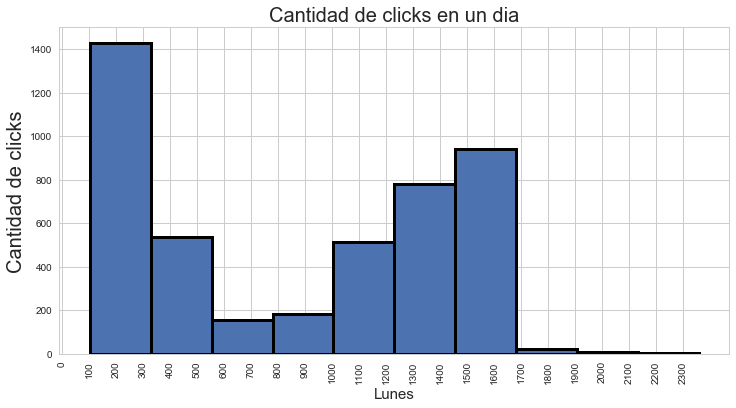

In [48]:
dia7.hist(column='hora', grid=True, edgecolor = "Black", linewidth =3,figsize=(12,6), xrot=90, xlabelsize=10, ylabelsize=10);
plt.xticks(range(0,2359,100));
plt.xlabel('Lunes', fontsize=15);
plt.ylabel('Cantidad de clicks', fontsize=20)
plt.title('Cantidad de clicks en un dia', fontsize=20);

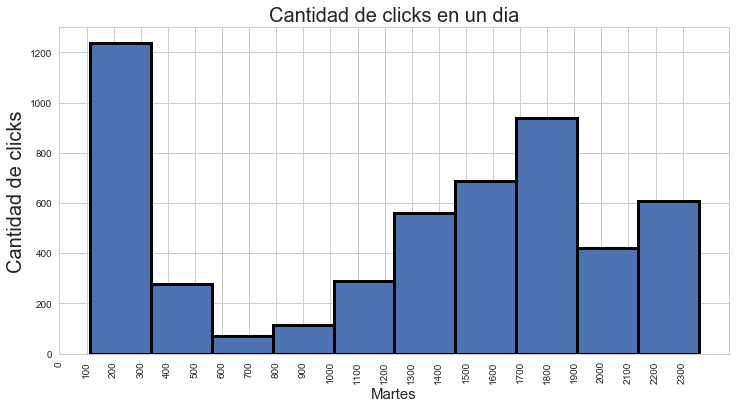

In [50]:
dia8.hist(column='hora', grid=True, edgecolor = "Black", linewidth = 3,figsize=(12,6), xrot=90, xlabelsize=10, ylabelsize=10);
plt.xticks(range(0,2359,100));
plt.xlabel('Martes', fontsize=15);
plt.ylabel('Cantidad de clicks', fontsize=20)
plt.title('Cantidad de clicks en un dia', fontsize=20);

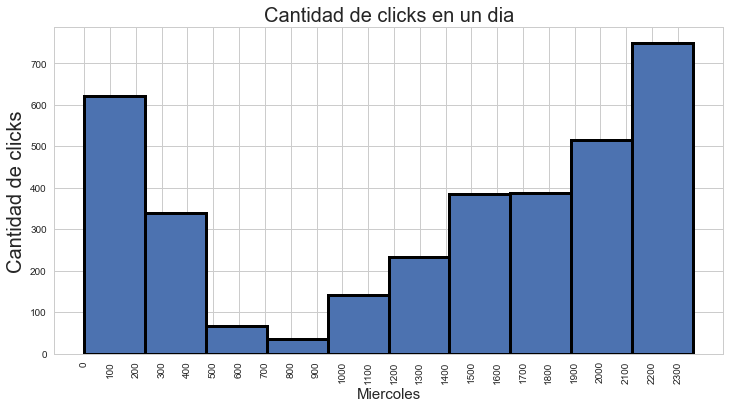

In [51]:
dia9.hist(column='hora', grid=True, edgecolor = "Black", linewidth = 3,figsize=(12,6), xrot=90, xlabelsize=10, ylabelsize=10);
plt.xticks(range(0,2359,100));
plt.xlabel('Miercoles', fontsize=15);
plt.ylabel('Cantidad de clicks', fontsize=20)
plt.title('Cantidad de clicks en un dia', fontsize=20);

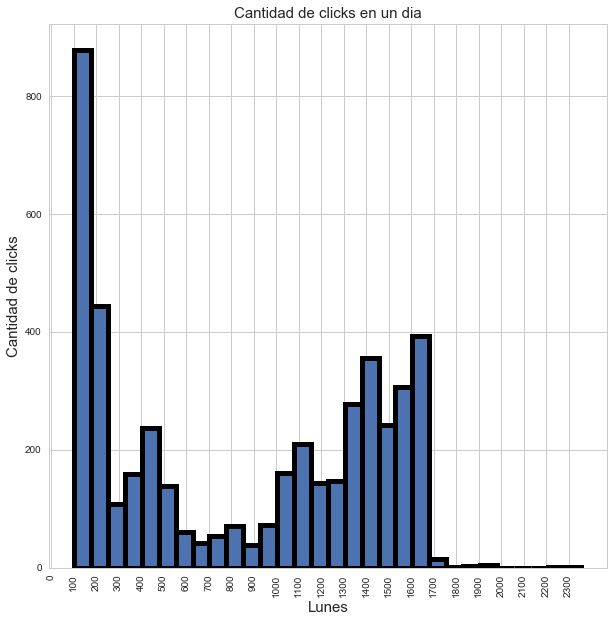

In [61]:
#prueba para usar en los otros graficos...

dia7.hist(column='hora',bins=30, grid=True, edgecolor = "Black", linewidth = 5,figsize=(10,10), xrot=90, xlabelsize=10, ylabelsize=10);
plt.xticks(range(0,2359,100));
plt.xlabel('Lunes', fontsize=15);
plt.ylabel('Cantidad de clicks', fontsize=15)
plt.title('Cantidad de clicks en un dia', fontsize=15);

In [56]:
clicks['dia'].count()

26351